# Assignment 1: Data Parsing, Cleansing and Integration
## Task 3
#### Student Name: Ayush Kamleshbhai Patel
#### Student ID: s3891013

Date: XXXX

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy


## Introduction
Give general information of this assessment here, e.g., what problems you encounter in integration, general steps and solutions you've taken to integrate the data. 

<span style="color: red"> Note that this is a sample notebook only. You will need to fill in the proper markdown and code blocks. You might also want to make necessary changes to the structure to meet your own needs. Note also that any generic comments written in this notebook are to be removed and replace with your own words.</span>


##  Import libraries 

In [4]:
# Code to import libraries as you need in this assessment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Examining and loading data
Examine "\<student\_id\>_dataset2.csv" the structure and schema. 


Summary of Data:
         Monthly Payment              Closing   Organisation Location  \
count       5000.000000                 5000           4514     5000   
unique              NaN                 2022           2441      437   
top                 NaN  2012-10-22 15:00:00  UKStaffsearch       UK   
freq                NaN                    8             52      761   
mean        2888.458606                  NaN            NaN      NaN   
std         1347.913223                  NaN            NaN      NaN   
min          417.170000                  NaN            NaN      NaN   
25%         1920.000000                  NaN            NaN      NaN   
50%         2605.000000                  NaN            NaN      NaN   
75%         3541.670000                  NaN            NaN      NaN   
max         8000.000000                  NaN            NaN      NaN   

                      Category  Full-Time Equivalent (FTE)  \
count                     5000                 5000.00

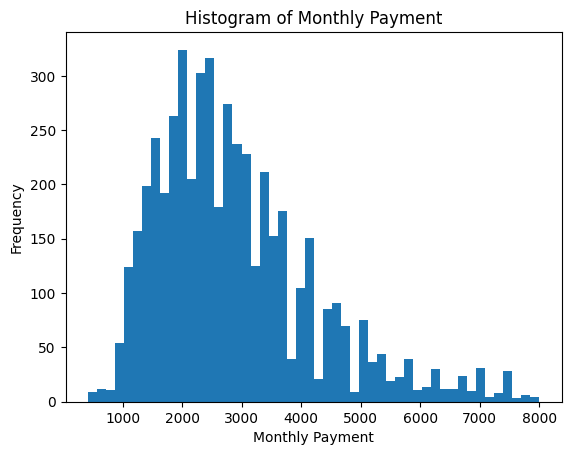

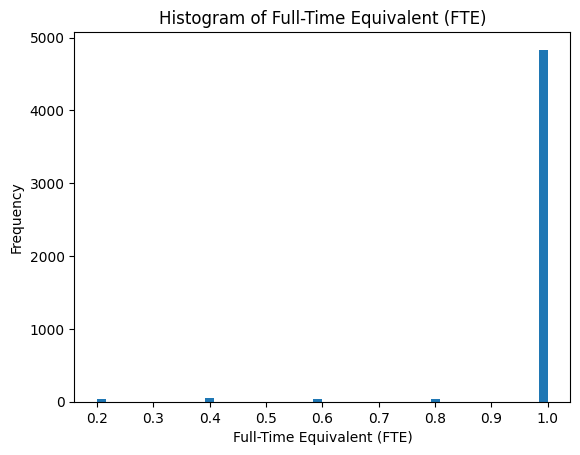

In [5]:
# Code to inspect the provided data file
# Couple of notes for all code block in this notebook
## please provide proper comment on your code
## Please re-start and run all cells to make sure codes are runable and include your output in the submission
# -------------------------------------------------------------------------------------------------------------
df = pd.read_csv('s3891013_dataset2.csv')
# Provide a summary of the data
print("\nSummary of Data:\n", df.describe(include='all'))

# Check for missing values in the dataset
print("\nMissing Values in Each Column:\n", df.isnull().sum())

# Display the structure (info) of the data frame
print("\nInfo of the Data Frame:")
df.info()

# Display unique values for categorical columns
cat_cols = df.select_dtypes(['object']).columns
print("\nUnique Values for Categorical Columns:")
for col in cat_cols:
    print(col, ":", df[col].nunique())

# Plot histograms for numeric columns
num_cols = df.select_dtypes(['float64', 'int64']).columns

for col in num_cols:
    plt.figure()
    df[col].hist(bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(False)
    plt.show()

### 2. Resolving schema conflicts
Give some general information about the conflicts you found in two schemas and steps you taken to resolve them.

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

#### Conflict 1: XXXX (e.g. naming conflicts in xx column and xx column)
Here give some general information about this conflict.

In [6]:
# Code to inspect data and identify conflicts in schema
df.nunique()

Monthly Payment                684
Closing                       2022
Organisation                  2441
Location                       437
Category                         8
Full-Time Equivalent (FTE)       5
Opening                       1943
Job Title                     5000
Type                             2
dtype: int64

Tell me about how you fix the conflict here

In [3]:
# Code to fix the conflict

#### Conflict 2: XXXX
......

### 3. Merging data

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

In [4]:
# Code to merge two data sets

### 4. Resolving data conflicts:
Give some general information about the data conflicts you found in the unified table and how you resolve them.

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

#### Conflict 1: XXXX (e.g., complete duplications)
Here give some general information about this conflict.

In [5]:
# Code to inspect data and identify conflicts in data

Tell me about how you fix the conflict here

In [6]:
# Code to fix the conflict

......

#### Finding global key for the data
Find a proper global key for the integrated data and give justification here.

In [7]:
# Code to identify global key

.......

#### Conflict 2: XXXX (e.g., other duplications)
Here give some general information about this conflict.

### 5. Saving the integrated and reshaped data
The last part of the integration process is to export our output data to csv format, named as:
- '\<student\_id\>_dataset_integrated.csv'

In [ ]:
# code to save output data

## Summary of the Assessment Task
Give a short summary and anything you would like to talk about this assessment task here.